In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_dir = '../input/covid-19-x-ray-10000-images/dataset'
os.listdir(dataset_dir)

['normal', 'covid']

In [3]:
# Adding directories of the images to their lists
normal_images = []
for img_path in glob.glob('../input/covid-19-x-ray-10000-images/dataset/normal/*'):
    normal_images.append(plt.imread(img_path))

covid_images = []
for img_path in glob.glob('../input/covid-19-x-ray-10000-images/dataset/covid/*'):
    covid_images.append(plt.imread(img_path))
    

In [4]:
normal_images[10]

array([[62, 63, 61, ..., 45, 45, 44],
       [56, 59, 60, ..., 47, 46, 45],
       [55, 57, 58, ..., 50, 49, 48],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

Text(0.5, 1.0, 'Lung With Covid')

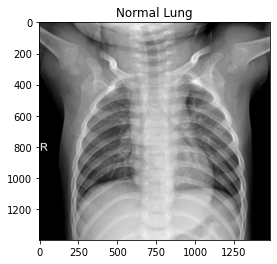

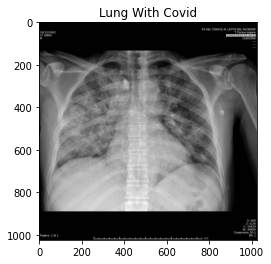

In [5]:
plt.figure()
plt.imshow(normal_images[10], cmap='gray')
plt.title('Normal Lung')

plt.figure()
plt.imshow(covid_images[10], cmap='gray')
plt.title('Lung With Covid')

In [6]:
print(len(normal_images))
print(len(covid_images))

28
70


In [7]:
img_w = 150
img_h = 150
channels = 3

input_shape = (img_w, img_h, channels)
n_classes = 2
epochs = 50
batch_size = 10

In [8]:
# Generating new data and apply them to the current data
train_data_gen = ImageDataGenerator(rescale=1/255.0, shear_range=0.2,
                                   zoom_range=0.2, validation_split=0.2)

train_generator = train_data_gen.flow_from_directory(dataset_dir, target_size=(img_w, img_h),
                                                    class_mode='binary', batch_size=batch_size, subset='training')

valid_generator = train_data_gen.flow_from_directory(dataset_dir, target_size=(img_w, img_h),
                                                    class_mode='binary', batch_size=batch_size, subset='validation')

Found 79 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [9]:
# Building Model
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(265, (3,3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-08-17 22:47:34.194690: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 265)       3

In [11]:
train_generator.samples

79

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')

In [13]:
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=epochs,
                             steps_per_epoch=train_generator.samples//batch_size, callbacks=[callback])

2022-08-17 22:47:34.749186: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
7/7 [==============================] - 6s 772ms/step - loss: 0.8512 - accuracy: 0.7246 - val_loss: 0.5935 - val_accuracy: 0.7368
Epoch 2/50
7/7 [==============================] - 5s 683ms/step - loss: 0.6179 - accuracy: 0.7246 - val_loss: 0.5159 - val_accuracy: 0.7368
Epoch 3/50
7/7 [==============================] - 4s 656ms/step - loss: 0.4518 - accuracy: 0.7971 - val_loss: 0.3775 - val_accuracy: 0.7895
Epoch 4/50
7/7 [==============================] - 5s 669ms/step - loss: 0.3665 - accuracy: 0.8696 - val_loss: 0.4687 - val_accuracy: 0.7895
Epoch 5/50
7/7 [==============================] - 5s 715ms/step - loss: 0.3344 - accuracy: 0.8696 - val_loss: 0.3462 - val_accuracy: 0.8421
Epoch 6/50
7/7 [==============================] - 5s 674ms/step - loss: 1.2538 - accuracy: 0.8406 - val_loss: 0.3338 - val_accuracy: 0.7895
Epoch 7/50
7/7 [==============================] - 5s 660ms/step - loss: 0.4983 - accuracy: 0.8261 - val_loss: 0.6301 - val_accuracy: 0.7895
Epoch 8/50
7/7 [====

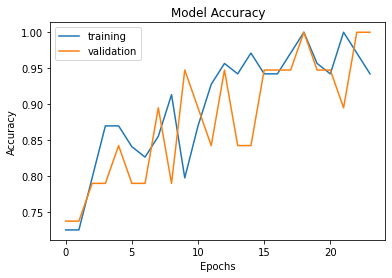

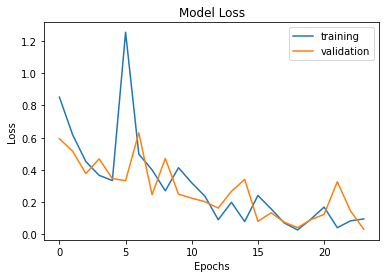

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['training', 'validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['training', 'validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
print(f"Training Accuracy : {history.history['accuracy'][-1]}")
print(f"Validation Accuracy : {history.history['val_accuracy'][-1]}")

Training Accuracy : 0.9420289993286133
Validation Accuracy : 1.0


In [16]:
print(f"Training Loss : {history.history['loss'][-1]}")
print(f"Validation Loss : {history.history['val_loss'][-1]}")

Training Loss : 0.09611640125513077
Validation Loss : 0.032374344766139984


In [17]:
validation_labels = valid_generator.classes
validation_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [18]:
class_indices = valid_generator.class_indices
class_indices

{'covid': 0, 'normal': 1}

In [19]:
pred = model.predict(valid_generator)
pred_class_labels = np.argmax(pred, axis=1) # return the index of the max value
pred_class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
new_class_indices = dict((value, key) for key, value in class_indices.items())
new_class_indices

{0: 'covid', 1: 'normal'}

In [21]:
final_pred = [new_class_indices[p] for p in pred_class_labels]
final_pred

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid']

In [22]:
cm = confusion_matrix(validation_labels, pred_class_labels)
cm

array([[14,  0],
       [ 5,  0]])

Text(0, 0.5, 'Actual')

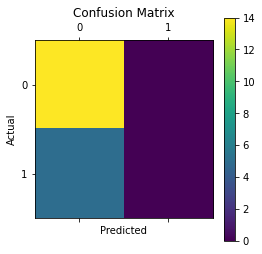

In [23]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [24]:
report = classification_report(validation_labels, pred_class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19



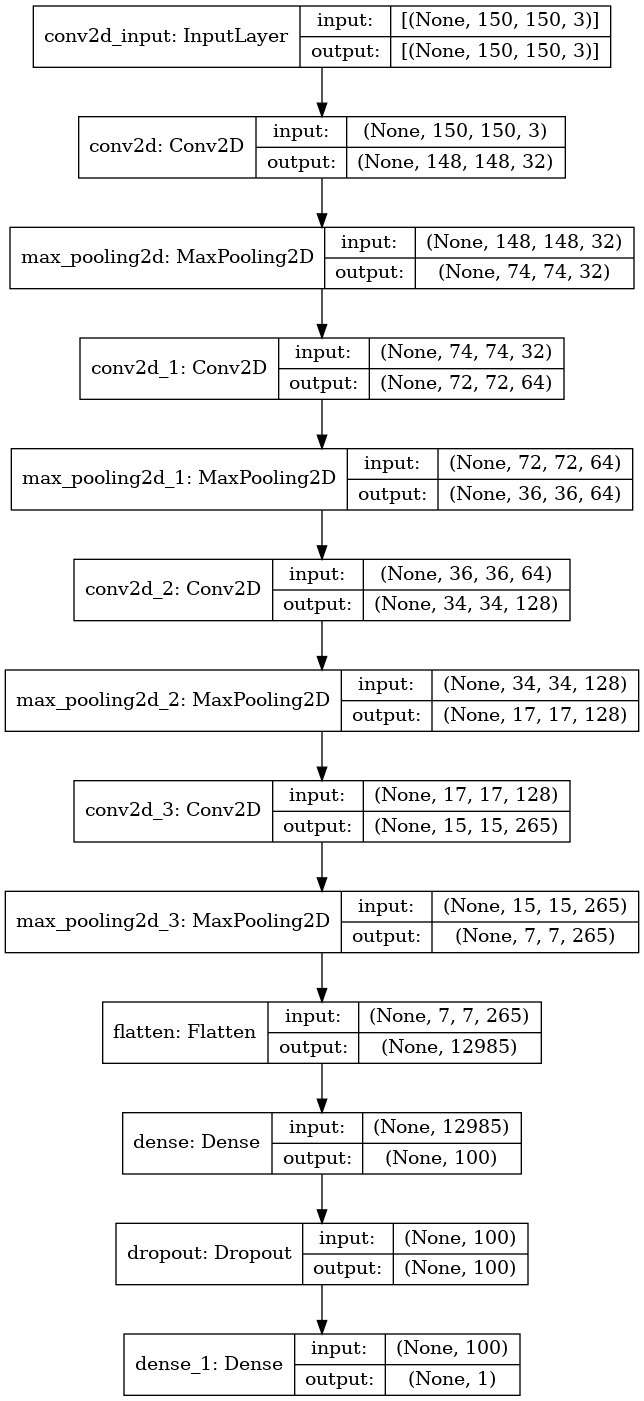

In [27]:
plot_model(model, show_shapes=True)

In [ ]:
model.save('covid-detection.h5')